### Importing the libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.18.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

Found 8000 images belonging to 2 classes.


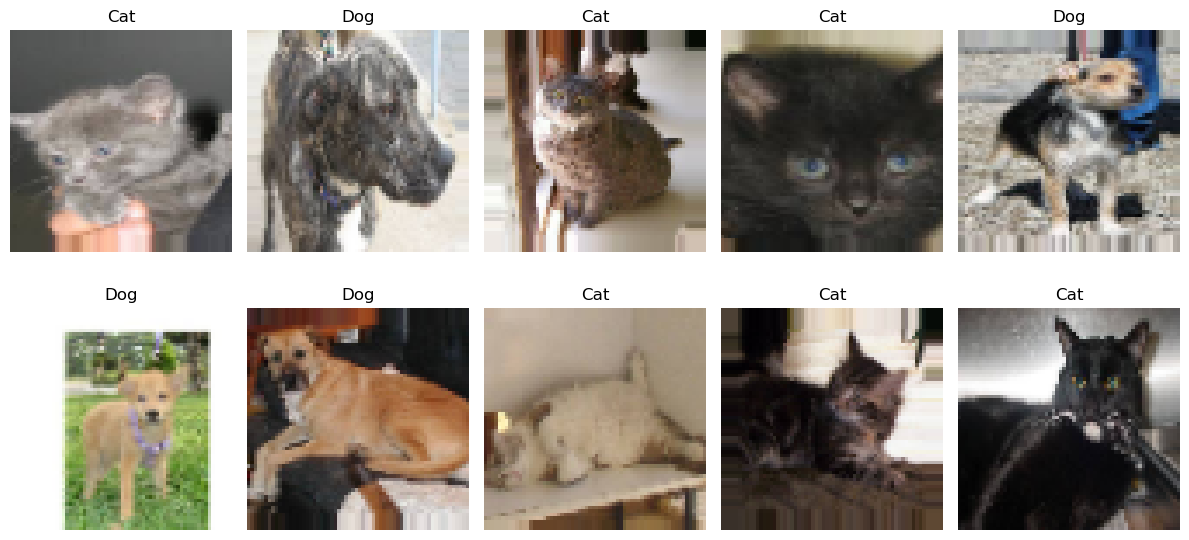

In [53]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)                        
training_set = train_datagen.flow_from_directory('dataset/training_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')
images, labels = next(training_set)

# Plot the first 10 images
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])  # Images are already normalized
    plt.title('Cat' if labels[i] == 0 else 'Dog')  # Assuming class 0 = Cat, 1 = Dog
    plt.axis('off')
plt.tight_layout()
plt.show()

### Preprocessing the Test set

Found 2003 images belonging to 2 classes.


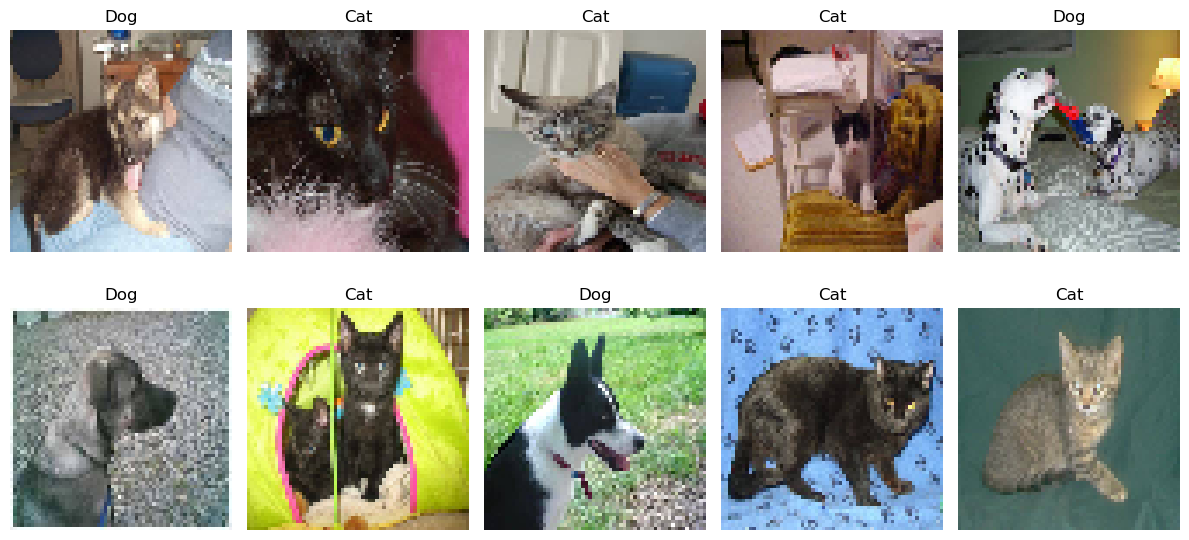

In [55]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary') 
images, labels = next(test_set)

# Plot the first 10 images
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])  # Images are already normalized
    plt.title('Cat' if labels[i] == 0 else 'Dog')  # Assuming class 0 = Cat, 1 = Dog
    plt.axis('off')
plt.tight_layout()
plt.show()

## Part 2 - Building the CNN

### Initialising the CNN

In [11]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))

### Step 2 - Pooling

In [15]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2))

### Adding a second convolutional layer

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2))

### Step 3 - Flattening

In [19]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [21]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

### Step 5 - Output Layer

In [23]:
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [26]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [28]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 77s 297ms/step - accuracy: 0.5220 - loss: 0.7059 - val_accuracy: 0.6360 - val_loss: 0.6518
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 69s 276ms/step - accuracy: 0.6662 - loss: 0.6257 - val_accuracy: 0.6755 - val_loss: 0.6063
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 279ms/step - accuracy: 0.7115 - loss: 0.5666 - val_accuracy: 0.7064 - val_loss: 0.5816
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 81s 276ms/step - accuracy: 0.7338 - loss: 0.5311 - val_accuracy: 0.7434 - val_loss: 0.5229
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 68s 273ms/step - accuracy: 0.7532 - loss: 0.5002 - val_accuracy: 0.7459 - val_loss: 0.5140
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 68s 273ms/step - accuracy: 0.7563 - loss: 0.5016 - val_accuracy: 0.7299 - val_loss: 0.5498
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 68s 272ms/step - accuracy: 0.7741 - loss: 0.4711 - val_accuracy: 0.7683 - val_loss: 0.4751
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 277ms/step - accuracy: 0.7820 - loss: 0

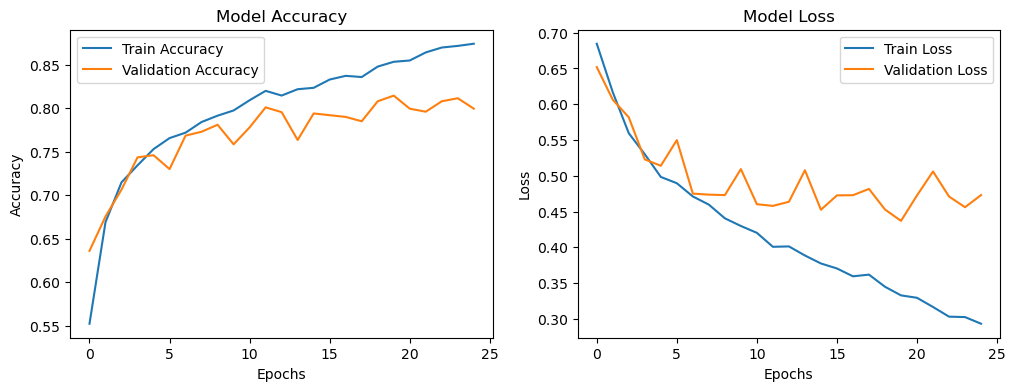

In [29]:
# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_training_history(history)

Observations : 
1. Accuracy Graph
Training Accuracy: It steadily increases with epochs, indicating the model is learning and fitting well to the training data.
Validation Accuracy: It follows a similar trend initially but fluctuates after a certain point.
This suggests the model might be starting to overfit the training data because the validation accuracy does not consistently improve beyond a certain epoch.
2. Loss Graph
Training Loss: It consistently decreases with epochs, showing that the model's predictions on the training data improve over time.
Validation Loss: It also decreases initially but starts to fluctuate and even slightly increases in later epochs.
This is a clear sign of overfitting, where the model performs well on training data but struggles to generalize on unseen validation data.
3. Overfitting Observation
The divergence between training and validation accuracy/loss curves in the later epochs suggests that the model is learning the noise or specific patterns in the training data that do not generalize well to validation data.


## Part 4 - Making a single prediction

In [31]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [32]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_img = image.load_img('dataset/test_set/cats/cat.4019.jpg', target_size = (64,64))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis = 0)
result = cnn.predict(test_img)

if result[0][0] == 1:
    print('dog')
else:
    print('cat')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
cat
